# Importing Libraries



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive/


# Data Preprocessing

In [6]:
df = pd.read_csv('/content/drive/MyDrive/001 My Skills/002 CS Engineering   Automated Math (BPHC)/004 Data Science (DS)   Artificial Intelligence (AI)/002 Tabular Cross Sectional Data (Structured Data) (Non Sequential Data)/002 Machine Learning (ML)/001 Supervised Learning/002 Classification Problem/001 Univariate Binary Classification/001 Discriminant Learning/005 Linear Discriminant Analysis (LDA)/dataset_FLD.csv')

In [7]:
df

,X1,X2,X3,Y
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [8]:
# not doing any test train split just using the original dataset as the train dataset
df_train = df
df_train
x_train = np.array(df_train.iloc[:,[0,1,2]])
y_train = np.array(df_train.iloc[:,3])


,X1,X2,X3,Y
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


# Data Learning Without using SKLearn Library

## LDA ALgorithm Class

In [9]:
import numpy as np
import math
class LDA:

  #constructor
  def __init__(self):
    self.X = 0

  #returns nothing
  def fit_transform(self,X,Y):
    self.X = X
    self.Y = Y

    #splitting original dataset into class1 dataset and class2 dataset
    df = pd.concat([pd.DataFrame(self.X), pd.DataFrame(self.Y,columns=['y'])], axis=1)
    df_sorted = df.sort_values(by='y')
    df_sorted.reset_index(drop=True,inplace=True)
    c=0
    for i in np.array(df_sorted.iloc[:,-1]):
      c=c+1
      if i==1:
        break
    self.df_class1 = df_sorted.iloc[0:c-1] #class1 represents -ve class
    self.df_class2 = df_sorted.iloc[c-1:] #class2 represents +ve class

    #calculating mean vector and covariance matrix of class1 dataset
    self.x_df_class1 = np.array(self.df_class1.iloc[:,:-1])
    self.y_df_class1 = np.array(self.df_class1.iloc[:,-1])
    self.x_df_class1_shape = np.shape(self.x_df_class1)
    self.mean_class1 = (1/self.x_df_class1_shape[0])*(np.dot((self.x_df_class1.transpose()),(np.ones((self.x_df_class1_shape[0],1)))))
    self.covariance_class1 = (1/self.x_df_class1_shape[0])*(np.dot((self.x_df_class1 - np.dot(np.ones((self.x_df_class1_shape[0],1)),self.mean_class1.transpose())).transpose(),(self.x_df_class1 - np.dot(np.ones((self.x_df_class1_shape[0],1)),self.mean_class1.transpose()))))

    #calculating mean vector and covariance matrix of class2 dataset
    self.x_df_class2 = np.array(self.df_class2.iloc[:,:-1])
    self.y_df_class2 = np.array(self.df_class2.iloc[:,-1])
    self.x_df_class2_shape = np.shape(self.x_df_class2)
    self.mean_class2 = (1/self.x_df_class2_shape[0])*(np.dot((self.x_df_class2.transpose()),(np.ones((self.x_df_class2_shape[0],1)))))
    self.covariance_class2 = (1/self.x_df_class2_shape[0])*(np.dot((self.x_df_class2 - np.dot(np.ones((self.x_df_class2_shape[0],1)),self.mean_class2.transpose())).transpose(),(self.x_df_class2 - np.dot(np.ones((self.x_df_class2_shape[0],1)),self.mean_class2.transpose()))))
    
  #calculating the weight vector W using formula W = k*(Sw)-1*(mean_class1 - mean_class2)
  def weight_vector(self):
    self.Sw = self.covariance_class1 + self.covariance_class2
    self.W = np.dot(np.linalg.inv(self.Sw),(self.mean_class1 - self.mean_class2)) # considering unity proportionality constant
    sum = 0
    for i in self.W:
      sum = sum + (i*i)
    self.W = self.W/math.sqrt(sum)
    return self.W

  def projections1D(self): 
    self.x_class1_projected = np.dot(self.x_df_class1,self.W)
    self.y_class1_projected = self.y_df_class1
    self.class1_projected = pd.concat([pd.DataFrame(self.x_class1_projected),pd.DataFrame(self.y_df_class1)],axis=1)
    self.x_class2_projected = np.dot(self.x_df_class2,self.W)
    self.y_class2_projected = self.y_df_class2
    self.class2_projected = pd.concat([pd.DataFrame(self.x_class2_projected),pd.DataFrame(self.y_df_class2)],axis=1)
    #self.projected_data = pd.concat([pd.DataFrame(self.class1_projected),pd.DataFrame(self.class2_projected)])
    return self.class1_projected,self.class2_projected
  
  def threshold_point(self):
    self.mean_class1_projected = np.mean(self.x_class1_projected)
    self.mean_class2_projected = np.mean(self.x_class2_projected)
    self.variance_class1_projected = np.var(self.x_class1_projected) 
    self.variance_class2_projected = np.var(self.x_class2_projected)
    [self.root1 , self.root2] = np.roots([self.variance_class2_projected - self.variance_class1_projected , 2*(self.mean_class2_projected*self.variance_class1_projected - self.mean_class1_projected*self.variance_class2_projected) , (self.mean_class1_projected*self.mean_class1_projected*self.variance_class2_projected - self.mean_class2_projected*self.mean_class2_projected*self.variance_class1_projected - self.variance_class1_projected*self.variance_class2_projected*math.log(self.variance_class2_projected/self.variance_class1_projected))])
    if self.root1 < max(self.mean_class2_projected,self.mean_class1_projected) and self.root1 > min(self.mean_class1_projected,self.mean_class2_projected):
      self.threshold = self.root1
    else:
      self.threshold = self.root2
    return self.mean_class1_projected,self.mean_class2_projected,self.variance_class1_projected,self.variance_class2_projected,self.threshold

  #returns an array of predicted values
  def predict(self,x):
    y_predicted = list()
    for i in x:
      if(i>self.threshold):
        y_predicted.append(1)
      else:
        y_predicted.append(0)
    return y_predicted
      


## Evaluation Metric Class

In [10]:
import numpy as np
import math

#pass y_actual and y_pred as numpy row array
class evaluation_metric:

    #constructor
    def __init__(self):
        self.y_pred = 0
        self.y_actual = 0

    def confusion_matrix(self , y_actual , y_pred):
        self.true_positives = 0
        self.true_negatives = 0
        self.false_positives = 0
        self.false_negatives = 0
        for i in range(len(y_actual)):
          if y_actual[i] ==1:
            if y_pred[i] == 1:
              self.true_positives += 1
            else:
              self.false_positives += 1
          else:
            if y_pred[i] == 0:
              self.true_negatives += 1
            else:
              self.false_negatives +=1
        print("True Positives : {}".format(self.true_positives))
        print("True Negatives : {}".format(self.true_negatives))
        print("False Positives : {}".format(self.false_positives))
        print("False Negatives : {}".format(self.false_negatives))

    def accuracy(self):
      print("Accuracy : {}".format((self.true_negatives+self.true_positives)/(self.true_positives+self.true_negatives+self.false_negatives+self.false_positives)))

## Solving Classification using user defined LDA algorithm

In [11]:
#creating objects of user defined class
lda_classifier = LDA()
m = evaluation_metric()

In [12]:
lda_classifier.fit_transform(x_train,y_train)

In [13]:
#printing the weight vector
W = lda_classifier.weight_vector()
print("Unit(Normalized) Weight vector is : {}".format(W.transpose()))


Unit(Normalized) Weight vector is : [[ 0.00655686  0.01823739 -0.99981218]]


In [14]:
#printing 1D projected data
neg_proj , pos_proj = lda_classifier.projections1D()
projected_data = pd.concat([pd.DataFrame(neg_proj),pd.DataFrame(pos_proj)])
print("Projected Data is")
projected_data.reset_index(drop=True,inplace=True)
projected_data

Projected Data is


,0,0
0,1.015099,0
1,1.107372,0
2,1.100734,0
3,1.146494,0
4,1.104290,0
...,...,...
995,-0.890798,1
996,-0.591859,1
997,-1.026288,1
998,-1.192968,1


In [15]:
#printing threshold point,1D Vector and 3D vector
xbar_neg,xbar_pos,sigma2_neg,sigma2_pos,threshold_pt = lda_classifier.threshold_point()
print("Threshold Point is: {}".format(threshold_pt))
print("Unit 1D Vector (Discriminating Line) is : X = {}".format(threshold_pt))
print("Unit 3D Vector (Discriminating Plane) is : {}X1+{}X2+{}X3 = {}".format(W[0],W[1],W[2],threshold_pt))

Threshold Point is: 0.3893028020993766
Unit 1D Vector (Discriminating Line) is : X = 0.3893028020993766
Unit 3D Vector (Discriminating Plane) is : [0.00655686]X1+[0.01823739]X2+[-0.99981218]X3 = 0.3893028020993766


Text(0.5, 0.92, '3D')

Text(0.5, 0, 'X1')

Text(0.5, 0, 'X2')

Text(0.5, 0, 'X3')

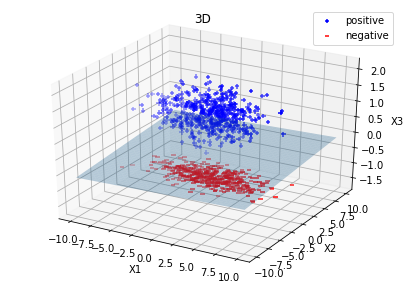

In [16]:
#Graph for 3D Data and the hyperplane of projection
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5)) #to get the figure
ax = fig.add_subplot(projection='3d') 
ax.set_title('3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

df_train_sorted = df_train.sort_values(by='Y')
df_train_sorted.reset_index(drop=True,inplace=True)
c=0
for i in np.array(df_train_sorted.iloc[:,-1]):
  c=c+1
  if i==1:
    break
df_train_negative = df_train_sorted.iloc[0:c-1]
df_train_positive = df_train_sorted.iloc[c-1:]

x1 = [i for i in np.array(df_train_positive.iloc[:,0])]
x2 = [i for i in np.array(df_train_positive.iloc[:,1])]
x3 = [i for i in np.array(df_train_positive.iloc[:,2])]
ax.scatter(x1,x2,x3 , color = 'blue' , label = 'positive' , marker='+')

x1 = [i for i in np.array(df_train_negative.iloc[:,0])]
x2 = [i for i in np.array(df_train_negative.iloc[:,1])]
x3 = [i for i in np.array(df_train_negative.iloc[:,2])]
ax.scatter(x1,x2,x3 , color = 'red' , label = 'negative' , marker='_')

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
X1,X2 = np.meshgrid(x1,x2)
X3 = (0.3628485625685012 -(0.00655686*X1+0.01823739*X2))/(-0.99981218)
ax.plot_surface(X1,X2,X3,alpha=0.3)
plt.legend()
plt.show()


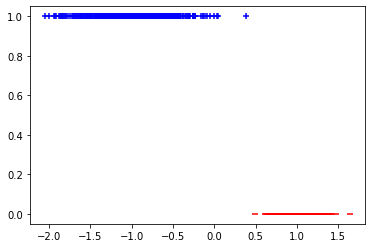

In [17]:
#Graph for 1D projected Data
plt.scatter(np.array(neg_proj.iloc[:,0]),np.array(neg_proj.iloc[:,1]),c='red',marker='_')
plt.scatter(np.array(pos_proj.iloc[:,0]),np.array(pos_proj.iloc[:,1]),c='blue',marker='+')

<function matplotlib.pyplot.show>

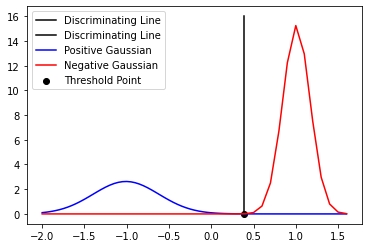

In [18]:
#Graph for 1D Gaussian Distributions
plt.scatter(threshold_pt,0,c='black',marker='o',label='Threshold Point')
plt.plot([threshold_pt,threshold_pt,threshold_pt,threshold_pt,threshold_pt,threshold_pt,threshold_pt,threshold_pt,threshold_pt],[0,2,4,6,8,10,12,14,16],0,c='black',label='Discriminating Line')
X = [-2,-1.95,-1.9,-1.85,-1.8,-1.75,-1.7,-1.65,-1.6,-1.555,-1.5,-1.45,-1.4,-1.35,-1.3,-1.25,-1.2,-1.15,-1.1,-1.05,-1.0,-0.95,-0.9,-0.85,-0.8,-0.75,-0.7,-0.65,-0.6,-0.55,-0.5,-0.45,-0.4,-0.35,-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
Y_distribution1 = list()
for x in X:
  Y_distribution1.append(0.3989422804*(1/sigma2_pos)*(math.exp((-1/2)*(x-xbar_pos)*(x-xbar_pos)*(1/sigma2_pos))))
plt.plot(X,Y_distribution1,c='blue',label='Positive Gaussian')
Y_distribution2 = list()
for x in X:
  Y_distribution2.append(0.3989422804*(1/sigma2_neg)*(math.exp((-1/2)*(x-xbar_neg)*(x-xbar_neg)*(1/sigma2_neg))))
plt.plot(X,Y_distribution2,c='red',label='Negative Gaussian')
plt.legend()
plt.show

In [19]:
#calculating accuracy for training
y_train_actual = np.array(df_train_sorted.iloc[:,-1])
print("Actual Values are : {}".format(y_train_actual))
y_train_predicted = lda_classifier.predict(np.array(projected_data.iloc[:,-1]),)
print("Predicted Values are : {}".format(y_train_predicted))
print('***********Training Errors are as follows***********')
m.confusion_matrix(y_train_actual,y_train_predicted)
m.accuracy()

Actual Values are : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

# Data Learning Using SKLearn Library

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_classifier = LinearDiscriminantAnalysis()

In [20]:
from sklearn.model_selection import cross_validate
LDA_result = (cross_validate(LDA_classifier,x_train,y_train,cv=7,return_train_score=True))
LDA_training_accuracy = LDA_result['train_score']
LDA_testing_accuracy = LDA_result['test_score']
print("training accuracy over 7 folds : {}".format(list(LDA_training_accuracy)))
print("average training accuracy : {}".format(np.mean(LDA_training_accuracy)))
print("")
print("testing accuracy over 7 folds :{}".format(list(LDA_testing_accuracy)))
print("average testing accuracy : {}".format(np.mean(LDA_testing_accuracy)))

training accuracy over 7 folds : [0.9964994165694282, 0.9953325554259043, 0.9964994165694282, 0.9953325554259043, 0.9964994165694282, 0.9988331388564761, 0.9965034965034965]
average training accuracy : 0.9964999994171523

testing accuracy over 7 folds :[1.0, 1.0, 1.0, 1.0, 1.0, 0.9790209790209791, 0.9929577464788732]
average testing accuracy : 0.9959969607856932
